## A PERSON WHOULD BE BUYING INSURANCE OR NOT

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

In [37]:
data=pd.read_csv('C:/Users/KARTHIK.G/Downloads/insurance_data.csv')
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [38]:
data.shape

(27, 2)

In [39]:
pd.unique(data["bought_insurance"])

array([0, 1], dtype=int64)

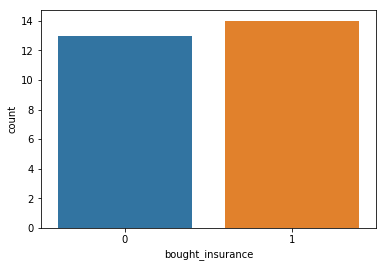

In [40]:
sb.countplot(data["bought_insurance"])

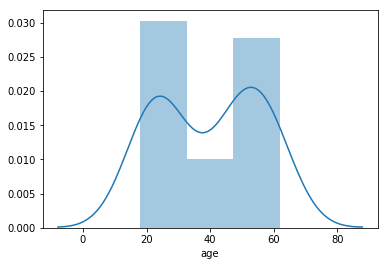

In [41]:
sb.distplot(data["age"])

In [42]:
data["age"].describe()

count    27.000000
mean     39.666667
std      15.745573
min      18.000000
25%      25.000000
50%      45.000000
75%      54.500000
max      62.000000
Name: age, dtype: float64

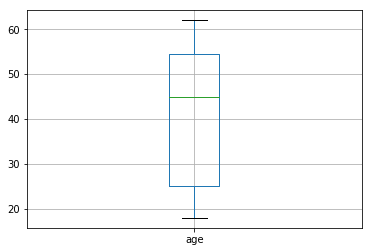

In [43]:
data.boxplot(column="age")

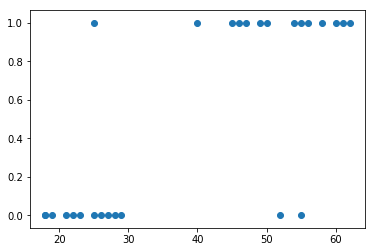

In [44]:
plt.scatter(data.age,data.bought_insurance)

C:\Users\KARTHIK.G\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


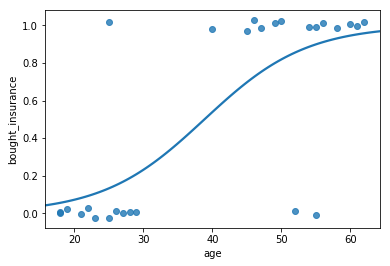

In [45]:
sb.regplot(x="age",y="bought_insurance",data=data,logistic=True,y_jitter=0.03)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(data[['age']],data['bought_insurance'],test_size=0.1,random_state=66)

In [48]:
x_test

,age
1,25
26,23
4,46


In [49]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(x_train,y_train)

In [51]:
model.predict(x_test)

array([0, 0, 1], dtype=int64)

In [52]:
model.predict_proba(x_test)

array([[0.57549206, 0.42450794],
       [0.60039152, 0.39960848],
       [0.31537126, 0.68462874]])

In [53]:
model.predict([[58]])

array([1], dtype=int64)

In [54]:
model.predict([[21]])

array([0], dtype=int64)

In [55]:
model.score(x_test,y_test)

1.0

## k-folds cross validation

In [57]:
from sklearn.model_selection import KFold

In [58]:
# for insurance dataset
kf=KFold(10)
x=data.age.values
for train,test in kf.split(x):
    print('train: %s, test: %s'%(x[train],x[test]))

train: [52 46 56 55 60 62 61 18 28 27 29 49 55 25 58 19 18 21 26 40 45 50 54 23], test: [22 25 47]
train: [22 25 47 55 60 62 61 18 28 27 29 49 55 25 58 19 18 21 26 40 45 50 54 23], test: [52 46 56]
train: [22 25 47 52 46 56 61 18 28 27 29 49 55 25 58 19 18 21 26 40 45 50 54 23], test: [55 60 62]
train: [22 25 47 52 46 56 55 60 62 27 29 49 55 25 58 19 18 21 26 40 45 50 54 23], test: [61 18 28]
train: [22 25 47 52 46 56 55 60 62 61 18 28 55 25 58 19 18 21 26 40 45 50 54 23], test: [27 29 49]
train: [22 25 47 52 46 56 55 60 62 61 18 28 27 29 49 19 18 21 26 40 45 50 54 23], test: [55 25 58]
train: [22 25 47 52 46 56 55 60 62 61 18 28 27 29 49 55 25 58 26 40 45 50 54 23], test: [19 18 21]
train: [22 25 47 52 46 56 55 60 62 61 18 28 27 29 49 55 25 58 19 18 21 45 50 54
 23], test: [26 40]
train: [22 25 47 52 46 56 55 60 62 61 18 28 27 29 49 55 25 58 19 18 21 26 40 54
 23], test: [45 50]
train: [22 25 47 52 46 56 55 60 62 61 18 28 27 29 49 55 25 58 19 18 21 26 40 45
 50], test: [54 23]
